<a href="https://colab.research.google.com/github/vinaygoud007/machine-learning/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Reading and Understanding the Data**


*   Importing data using the pandas library
*   Understanding the structure of the data



In [5]:
car_df = pd.read_csv("car_data.csv")

In [6]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
# checking the no.of rows and columns
car_df.shape

(301, 9)

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# checking the no.of missing values
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
## checking the distribution of categorical data
print(car_df.Fuel_Type.value_counts())
print(car_df.Seller_Type.value_counts())
print(car_df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**Encoding the Categorical Data**
> using preprocessig-->LabelEncoder





In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
df = car_df
df.Fuel_Type = le.fit_transform(df.Fuel_Type)
df.Seller_Type = le.fit_transform(df.Seller_Type)
df.Transmission = le.fit_transform(df.Transmission)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


Splitting the data into Training data and Test Data

In [14]:
# first drop the columns which are not useful for prediction
x = df.drop(['Car_Name','Selling_Price'], axis=1)
# target value is selling price that we will store in new variabe y
y = df['Selling_Price']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.1)

In [16]:
X_train.shape

(270, 7)

In [17]:
X_test.shape

(31, 7)

Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [25]:
prediction_rates = model.predict(X_test)
print(prediction_rates)

[ 6.55771636  5.65250704  5.1958488   4.42175429  7.79589645 11.4734256
  0.22320349 -1.48785322  6.81066963  1.57260346  7.31859181  4.81194625
  3.54127607 16.70184793  4.35080633  1.58765602  6.64974397  7.70673401
  2.10114567  0.25638201  4.91215108  1.63621974  4.65927003  2.10152655
  3.52068564  6.03681293  2.45229571  8.02342566  1.09816421  4.23542165
  5.827128  ]


Text(0, 0.5, 'Predicted Y')

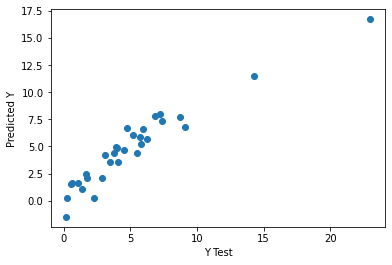

In [21]:
plt.scatter(Y_test,prediction_rates)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [24]:
from sklearn.metrics import r2_score
error_score = r2_score(Y_test,prediction_rates)
error_score

0.8768714994469173